# Using Convolutions in Keras
> Convolutions are the fundamental building blocks of convolutional neural networks. In this chapter, you will be introducted to convolutions and learn how they operate on image data. You will also see how you incorporate convolutions into Keras neural networks. This is the Summary of lecture "Image Processing with Keras in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Tensorflow-Keras, Vision, Deep_Learning]
- image: images/convolutions.gif

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

## Convolutions
- Using correlations in images
    - Natural images contain spatial correlations (pixels along a contour or edge)
    - How can we use these correlations?
- Convolutions {% fn 1 %}
![convolution](image/convolutions.gif)

{{ 'File from [here](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)'  | fndetail: 1 }}

### One dimensional convolutions
A convolution of an one-dimensional array with a kernel comprises of taking the kernel, sliding it along the array, multiplying it with the items in the array that overlap with the kernel in that location and summing this product.



In [3]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()
    
# Print conv
print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]


### Image convolutions
The convolution of an image with a kernel summarizes a part of the image as the sum of the multiplication of that part of the image with the kernel. In this exercise, you will write the code that executes a convolution of an image with a kernel using Numpy. Given a black and white image that is stored in the variable im, write the operations inside the loop that would execute the convolution with the provided kernel.

In [4]:
im = pd.read_csv('./dataset/brick_bw.csv').to_numpy()

In [5]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)

# Output array
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()
        
# Print result
print(result)

[[2.68104587 2.95947725 2.84313738 ... 0.         0.         0.        ]
 [3.01830077 3.07058837 3.05098049 ... 0.         0.         0.        ]
 [2.95163405 3.09934654 3.20261451 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


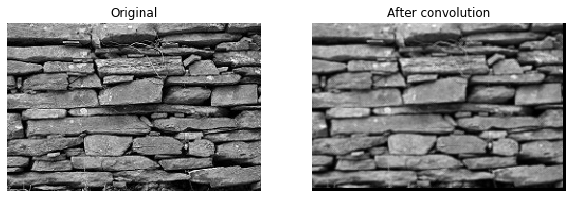

In [6]:
plot_comparison(im, result, 'After convolution')

### Defining image convolution kernels
In the previous exercise, you wrote code that performs a convolution given an image and a kernel. In this exercise, you will be asked to define the kernel that finds a particular feature in the image.

For example, the following kernel finds a vertical line in images:
```python
np.array([[-1, 1, -1], 
          [-1, 1, -1], 
          [-1, 1, -1]])
```

In [7]:
def convolution(image, kernel):
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)

    for ii in range(image.shape[0]-2):
        for jj in range(image.shape[1]-2):
            result[ii, jj] = np.sum(image[ii:ii+3, jj:jj+3] * kernel)

    return result

In [8]:
# Define the kernel that detect the horizontal line
kernel = np.array([[-1, -1, -1],
                   [1, 1, 1],
                   [-1, -1, -1]])

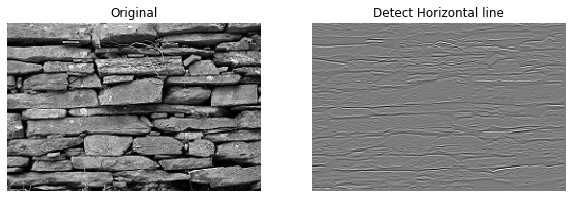

In [9]:
result = convolution(im, kernel)
plot_comparison(im, result, 'Detect Horizontal line')

In [10]:
# Define a kernel that finds a light spot surrounded by dark pixels.
kernel = np.array([[-1, -1, -1], 
                   [-1, 1, -1],
                   [-1, -1, -1]])

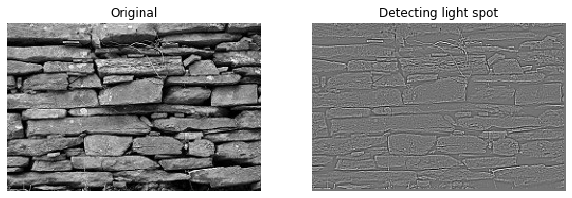

In [11]:
result = convolution(im, kernel)
plot_comparison(im, result, 'Detecting light spot')

In [12]:
# Define a kernel that finds a dark spot surrounded by bright pixels.
kernel = np.array([[1, 1, 1], 
                   [1, -1, 1],
                   [1, 1, 1]])

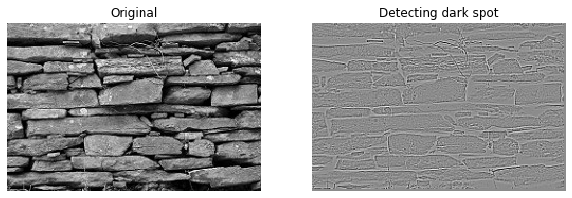

In [13]:
result = convolution(im, kernel)
plot_comparison(im, result, 'Detecting dark spot')

## Implementing image convolutions in Keras


### Convolutional network for image classification
Convolutional networks for classification are constructed from a sequence of convolutional layers (for image processing) and fully connected (`Dense`) layers (for readout). In this exercise, you will construct a small convolutional network for classification of the data from the fashion dataset.



In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

img_rows, img_cols = 28, 28

# Initialize the model object
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1)))

# Flatten the output of the convolutional layer
model.add(Flatten())
# Add an outputlayer for the 3 categories
model.add(Dense(3, activation='softmax'))

### Training a CNN to classify clothing types
Before training a neural network it needs to be compiled with the right cost function, using the right optimizer. During compilation, you can also define metrics that the network calculates and reports in every epoch. Model fitting requires a training data set, together with the training labels to the network.

In [15]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

train_data = train_data[(train_labels >= 0) & (train_labels < 3)][0:50].reshape(-1, 28, 28, 1)
train_labels = train_labels[(train_labels >= 0) & (train_labels < 3)][0:50]
train_labels = pd.get_dummies(train_labels).to_numpy()

test_data = test_data[(test_labels >= 0) & (test_labels < 3)][0:10].reshape(-1, 28, 28, 1)
test_labels = test_labels[(test_labels >= 0) & (test_labels < 3)][0:10]
test_labels = pd.get_dummies(test_labels).to_numpy()

In [16]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model on a training set
model.fit(train_data, train_labels, validation_split=0.2,
          epochs=3, batch_size=10);

Epoch 1/3
4/4 [==============================] - 0s 36ms/step - loss: 58.7289 - accuracy: 0.4500 - val_loss: 5.7333 - val_accuracy: 0.7000
Epoch 2/3
4/4 [==============================] - 0s 5ms/step - loss: 1.5333 - accuracy: 0.9250 - val_loss: 12.6149 - val_accuracy: 0.8000
Epoch 3/3
4/4 [==============================] - 0s 6ms/step - loss: 7.5137 - accuracy: 0.8750 - val_loss: 6.9894 - val_accuracy: 0.8000


### Evaluating a CNN with test data
To evaluate a trained neural network, you should provide a separate testing data set of labeled images. 

In [17]:
# Evaluate the model on separate test data
model.evaluate(test_data, test_labels, batch_size=10);

1/1 [==============================] - 0s 599us/step - loss: 0.0000e+00 - accuracy: 1.0000


## Tweaking your convolutions
- Calculating the size of the output
$$ O = ((I - K + 2P) / S) + 1$$
    - $I=$ size of the input
    - $K=$ size of the kernel
    - $P=$ size of the zero padding
    - $S=$ strides

### Tweaking your convolutions
Padding allows a convolutional layer to retain the resolution of the input into this layer. This is done by adding zeros around the edges of the input image, so that the convolution kernel can overlap with the pixels on the edge of the image.



In [18]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(img_rows, img_cols, 1),
                 padding='same'))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

### Add strides to a convolutional network
The size of the strides of the convolution kernel determines whether the kernel will skip over some of the pixels as it slides along the image. This affects the size of the output because when strides are larger than one, the kernel will be centered on only some of the pixels.



In [19]:
# Initialize the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(10, kernel_size=3, activation='relu',
                 input_shape=(img_rows, img_cols, 1),
                 strides=2))

# Feed into output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))